In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import PyTekScopeUSBTMC as TekScope # import PyTektronixScope.py modules
import time # imports time
tds2002b = TekScope.TektronixScope("/dev/usbtmc0") # creates an instance of TekScope.TektronixScope

# refreshes imported modules at each execution
%load_ext autoreload
%autoreload 2

TEKTRONIX,TDS 2002B,C101891,CF:91.1CT FV:v22.11


In [35]:
# Secuencia principal
tds2002b.write('INITIATE_CLEAR')
tds2002b.write('HEADER OFF')
tds2002b.set_data_encoding('RIBinary')
tds2002b.data_width(1)
tds2002b.write('ACQuire:MODe SAMple') # test.write('ACQuire:MODe PEAKdetect') lo descarto pues manual dice que puede verse mas ruidoso  
# tds2002b.write('ACQUIRE:STOPAFTER SEQuence')
tds2002b.write('ACQuire:STATE RUN')
tds2002b.write('CH1:COUPling DC')
tds2002b.write('CH2:COUPling DC')
tds2002b.write('CH1:SCAle 2.0E-3')
# tds2002b.write('CH1:SCAle 0.01')
tds2002b.write('CH1:POSition -2.0')
tds2002b.write('CH2:SCAle 1.0') # CFP-035 161007
# tds2002b.write('CH2:SCAle 0.5') # Ensayo DC-045 160926
tds2002b.write('CH2:POSition -2.00')
# tds2002b.horizontal_main_scale(2.5E-7)
tds2002b.horizontal_main_scale(2.5E-7)  # Ensayo DC-045 160926
# tds2002b.horizontal_main_position(2.0E-8) # 2.5E-7 para pul, lo ensayo para acq
# tds2002b.horizontal_main_position(1.0E-6)  # Ensayo DC-045 160926
tds2002b.horizontal_main_position(5.0E-7)  # Ensayo CFP-035 161007

tds2002b.trigger_source('CH2')
# tds2002b.trigger_level(1.96) # 1.96 [V] nominal para CFP-35 con electrónica modernizada 151016
# tds2002b.trigger_level(1.4) # Ensayo DC-045 160926
tds2002b.trigger_level(1.0) # 1.96 [V] ensayo FC-165 161013

<IPython.core.display.Javascript object>


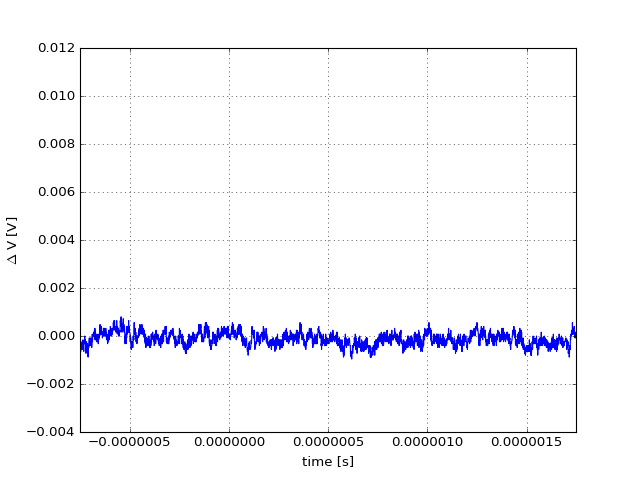

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ioff()

fig.show()
fig.canvas.draw()

# horizontal axis
[X_axis,c1] = tds2002b.read_data_one_channel('CH1', booster=True, x_axis_out=True) # erste
ax.set_xlim([X_axis[0],X_axis[-1]])

# vertical axis
tds2002b.scale = tds2002b.get_out_waveform_vertical_scale_factor()
tds2002b.offset = tds2002b.get_out_waveform_vertical_position()
yAxisLimits= ([tds2002b.offset* tds2002b.scale, (-2* tds2002b.offset+50)* tds2002b.scale])

i=1
n=100 # number of aquisitions
while i<n:
    ax.clear()
    ax.set_xlabel('time [s]')
    ax.set_ylabel('$\Delta$ V [V]')
    ax.set_autoscaley_on(False)
    ax.grid(True)
    ax.set_ylim(bottom= yAxisLimits[0], top= yAxisLimits[1] )
    ax.set_xlim(left= X_axis[0], right= X_axis[-1] )
    c1=tds2002b.read_data_one_channel('CH1', booster=True)
    ax.plot(X_axis,c1)
    fig.canvas.draw()
    i+=1

# Tests

In [7]:
buff2 = tds2002b.ask('CURVE?')
dataPointsCharacters= int(buff2[1:2])
dataOffset= 2+ dataPointsCharacters
dataCount= int(buff2[2:2+ dataPointsCharacters])
res2 = np.frombuffer(buff2, dtype = np.dtype('int8').newbyteorder('<'), count= dataCount, offset= dataOffset)
np.size(res2)

In [48]:
# vertical axis
tds2002b.scale = tds2002b.get_out_waveform_vertical_scale_factor()
tds2002b.offset = tds2002b.get_out_waveform_vertical_position()
yAxisLimits= ([tds2002b.offset* tds2002b.scale, (-2* tds2002b.offset+50)* tds2002b.scale])
tds2002b.offset, tds2002b.scale, yAxisLimits

(-50.0, 0.004, [-0.2, 0.6])

<IPython.core.display.Javascript object>


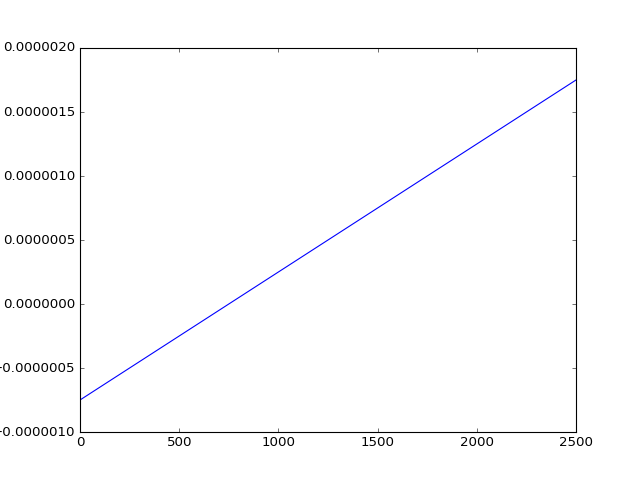

(-7.5000000000000002e-07, 1.7490000000000001e-06, None)

In [61]:
plt.plot(X_axis)
X_axis[0], X_axis[-1], plt.show()